<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/WHATAPP_CHAT_EDA/blob/main/IR1_EDA_BP_MSG_23521034_23521011_23521091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WhatsApp grup statistics exploration 

In [ ]:
pip install emoji

     |████████████████████████████████| 175 kB 25.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=239246e078f6ee4f9041505d06bd6f6b14c5df3f9fb0864701aa56765477f7f9
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
pip install heatmapz

In [ ]:
from datetime import *
from matplotlib.ticker import MaxNLocator
from nltk import *
from plotly import express as px
from seaborn import *
from wordcloud import ImageColorGenerator, STOPWORDS, WordCloud 
import datetime as dt
import emoji
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import regex
import seaborn as sns

## **1. Text Preparation**

In [ ]:
filename = "chatWA.txt"
df = pd.read_csv(filename, header = None, error_bad_lines = False, encoding = 'utf8')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 80: expected 4 fields, saw 5\nSkipping line 88: expected 4 fields, saw 6\nSkipping line 939: expected 4 fields, saw 5\nSkipping line 940: expected 4 fields, saw 6\nSkipping line 941: expected 4 fields, saw 7\nSkipping line 942: expected 4 fields, saw 6\nSkipping line 943: expected 4 fields, saw 6\nSkipping line 944: expected 4 fields, saw 7\nSkipping line 945: expected 4 fields, saw 6\nSkipping line 946: expected 4 fields, saw 7\nSkipping line 947: expected 4 fields, saw 6\nSkipping line 948: expected 4 fields, saw 6\nSkipping line 950: expected 4 fields, saw 6\nSkipping line 951: expected 4 fields, saw 6\nSkipping line 953: expected 4 fields, saw 6\nSkipping line 954: expected 4 fields, saw 5\nSkipping line 955: expected 4 fields, saw 6

,0,1,2,3
0,10/29/21,22:00 - Messages and calls are end-to-end enc...,not even WhatsApp,can read or listen to them. Tap to learn more.
1,10/29/21,22:00 - Dionisius Pratama ITB BI created grou...,NaN,NaN
2,10/29/21,22:00 - Dionisius Pratama ITB BI added you,NaN,NaN
3,10/29/21,22:00 - Dionisius Pratama ITB BI: Hai rekan r...,NaN,NaN
4,10/29/21,22:00 - Apep: q,NaN,NaN
...,...,...,...,...
3287,3/17/22,16:07 - Dionisius Pratama ITB BI: what???,NaN,NaN
3288,3/17/22,16:09 - Apep: <Media omitted>,NaN,NaN
3289,3/17/22,16:10 - Dionisius Pratama ITB BI: kalimatnya ...,NaN,NaN
3290,3/17/22,"16:10 - Dionisius Pratama ITB BI: ""yang penti...","konten gimana nanti""",NaN


In [ ]:
cols = [2, 3]
df.drop(df.columns[cols], axis = 1, inplace = True)
df

,0,1
0,10/29/21,22:00 - Messages and calls are end-to-end enc...
1,10/29/21,22:00 - Dionisius Pratama ITB BI created grou...
2,10/29/21,22:00 - Dionisius Pratama ITB BI added you
3,10/29/21,22:00 - Dionisius Pratama ITB BI: Hai rekan r...
4,10/29/21,22:00 - Apep: q
...,...,...
3287,3/17/22,16:07 - Dionisius Pratama ITB BI: what???
3288,3/17/22,16:09 - Apep: <Media omitted>
3289,3/17/22,16:10 - Dionisius Pratama ITB BI: kalimatnya ...
3290,3/17/22,"16:10 - Dionisius Pratama ITB BI: ""yang penti..."


In [ ]:
df.columns = ['Date', 'Chat']
df

,Date,Chat
0,10/29/21,22:00 - Messages and calls are end-to-end enc...
1,10/29/21,22:00 - Dionisius Pratama ITB BI created grou...
2,10/29/21,22:00 - Dionisius Pratama ITB BI added you
3,10/29/21,22:00 - Dionisius Pratama ITB BI: Hai rekan r...
4,10/29/21,22:00 - Apep: q
...,...,...
3287,3/17/22,16:07 - Dionisius Pratama ITB BI: what???
3288,3/17/22,16:09 - Apep: <Media omitted>
3289,3/17/22,16:10 - Dionisius Pratama ITB BI: kalimatnya ...
3290,3/17/22,"16:10 - Dionisius Pratama ITB BI: ""yang penti..."


In [ ]:
Message = df['Chat'].str.split('-', n = 1, expand = True)
Message

,0,1
0,22:00,Messages and calls are end-to-end encrypted. ...
1,22:00,"Dionisius Pratama ITB BI created group ""Semen..."
2,22:00,Dionisius Pratama ITB BI added you
3,22:00,Dionisius Pratama ITB BI: Hai rekan rekan
4,22:00,Apep: q
...,...,...
3287,16:07,Dionisius Pratama ITB BI: what???
3288,16:09,Apep: <Media omitted>
3289,16:10,Dionisius Pratama ITB BI: kalimatnya VD mulai...
3290,16:10,"Dionisius Pratama ITB BI: ""yang penting ngerj..."


In [ ]:
df['Time'] = Message[0]
df['Text'] = Message[1]
df

,Date,Chat,Time,Text
0,10/29/21,22:00 - Messages and calls are end-to-end enc...,22:00,Messages and calls are end-to-end encrypted. ...
1,10/29/21,22:00 - Dionisius Pratama ITB BI created grou...,22:00,"Dionisius Pratama ITB BI created group ""Semen..."
2,10/29/21,22:00 - Dionisius Pratama ITB BI added you,22:00,Dionisius Pratama ITB BI added you
3,10/29/21,22:00 - Dionisius Pratama ITB BI: Hai rekan r...,22:00,Dionisius Pratama ITB BI: Hai rekan rekan
4,10/29/21,22:00 - Apep: q,22:00,Apep: q
...,...,...,...,...
3287,3/17/22,16:07 - Dionisius Pratama ITB BI: what???,16:07,Dionisius Pratama ITB BI: what???
3288,3/17/22,16:09 - Apep: <Media omitted>,16:09,Apep: <Media omitted>
3289,3/17/22,16:10 - Dionisius Pratama ITB BI: kalimatnya ...,16:10,Dionisius Pratama ITB BI: kalimatnya VD mulai...
3290,3/17/22,"16:10 - Dionisius Pratama ITB BI: ""yang penti...",16:10,"Dionisius Pratama ITB BI: ""yang penting ngerj..."


In [ ]:
Message1 = df['Text'].str.split(':', n = 1, expand = True)
df['Text'] = Message1[1]
df['Name'] = Message1[0]
df = df.drop(columns = ['Chat'])
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('<media omitted>','MediaShared')
df['Text'] = df['Text'].str.replace('this message was deleted','DeletedMsg')
df

,Date,Time,Text,Name
0,10/29/21,22:00,None,Messages and calls are end-to-end encrypted. ...
1,10/29/21,22:00,None,"Dionisius Pratama ITB BI created group ""Semen..."
2,10/29/21,22:00,None,Dionisius Pratama ITB BI added you
3,10/29/21,22:00,hai rekan rekan,Dionisius Pratama ITB BI
4,10/29/21,22:00,q,Apep
...,...,...,...,...
3287,3/17/22,16:07,what???,Dionisius Pratama ITB BI
3288,3/17/22,16:09,MediaShared,Apep
3289,3/17/22,16:10,kalimatnya vd mulai relevan,Dionisius Pratama ITB BI
3290,3/17/22,16:10,"""yang penting ngerjain tugas dan ngumpulin ga...",Dionisius Pratama ITB BI


## **2. EDA**

### **EDA 01 : Tampilkan analisis terkait data sebelum melakukan preprocessing dan setelah melakukan preprocessing pada dataset!**

In [ ]:
df = df.dropna()
df = df.reset_index(drop = True)

df

,Date,Time,Text,Name
0,10/29/21,22:00,hai rekan rekan,Dionisius Pratama ITB BI
1,10/29/21,22:00,q,Apep
2,10/29/21,22:00,😂,Apep
3,10/29/21,22:00,mari berdoa,Dionisius Pratama ITB BI
4,10/29/21,22:00,anjirr 😂,Apep
...,...,...,...,...
3044,3/17/22,16:07,what???,Dionisius Pratama ITB BI
3045,3/17/22,16:09,MediaShared,Apep
3046,3/17/22,16:10,kalimatnya vd mulai relevan,Dionisius Pratama ITB BI
3047,3/17/22,16:10,"""yang penting ngerjain tugas dan ngumpulin ga...",Dionisius Pratama ITB BI


In [ ]:
print('Dimension = ', df.shape)
print('Missing Value = ', df.isnull().sum().sum())
print('New Dimension = ', df.shape)
print('Number of Author = ', df['Name'].nunique())
print('Name of Author = ', df['Name'].unique())

Dimension =  (3049, 4)
Missing Value =  0
New Dimension =  (3049, 4)
Number of Author =  3
Name of Author =  [' Dionisius Pratama ITB BI' ' Apep' ' aurell BI-S2']


In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
weeks = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thrusday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
    }

df['Day'] = df['Date'].dt.weekday.map(weeks)

In [ ]:
df = df[['Date', 'Day', 'Time', 'Name', 'Text']]

df

,Date,Day,Time,Name,Text
0,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,hai rekan rekan
1,2021-10-29,Friday,22:00,Apep,q
2,2021-10-29,Friday,22:00,Apep,😂
3,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,mari berdoa
4,2021-10-29,Friday,22:00,Apep,anjirr 😂
...,...,...,...,...,...
3044,2022-03-17,Thrusday,16:07,Dionisius Pratama ITB BI,what???
3045,2022-03-17,Thrusday,16:09,Apep,MediaShared
3046,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,kalimatnya vd mulai relevan
3047,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,"""yang penting ngerjain tugas dan ngumpulin ga..."


In [ ]:
df['Day'] = df['Day'].astype('category')

df['Letters'] = df['Text'].apply(lambda s : len(s))

df['Words'] = df['Text'].apply(lambda s : len(s.split(' ')))

URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Text.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)

MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Text.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

df

,Date,Day,Time,Name,Text,Letters,Words,Url_Count,Media_Count
0,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,hai rekan rekan,16,4,0,0
1,2021-10-29,Friday,22:00,Apep,q,2,2,0,0
2,2021-10-29,Friday,22:00,Apep,😂,2,2,0,0
3,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,mari berdoa,12,3,0,0
4,2021-10-29,Friday,22:00,Apep,anjirr 😂,9,3,0,0
...,...,...,...,...,...,...,...,...,...
3044,2022-03-17,Thrusday,16:07,Dionisius Pratama ITB BI,what???,8,2,0,0
3045,2022-03-17,Thrusday,16:09,Apep,MediaShared,12,2,0,0
3046,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,kalimatnya vd mulai relevan,28,5,0,0
3047,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,"""yang penting ngerjain tugas dan ngumpulin ga...",52,9,0,0


In [ ]:
print('Dimension = ', df.shape)
print('Missing Value = ', df.isnull().sum().sum())
print('New Dimension = ', df.shape)
print('Number of Author = ', df['Name'].nunique())
print('Name of Author = ', df['Name'].unique())

Dimension =  (3049, 9)
Missing Value =  0
New Dimension =  (3049, 9)
Number of Author =  3
Name of Author =  [' Dionisius Pratama ITB BI' ' Apep' ' aurell BI-S2']


### **EDA 02 : Tampilkan analisis terkait dengan statistik pesan yang dikirimkan pada dataset!**

In [ ]:
total_messages = df.shape[0]
print('Total Number of Messages : {}'.format(total_messages))

media_messages = df[df['Text'] == '<Media omitted>'].shape[0]
print('Total Number of Media Messages : {}'.format(media_messages))

links = np.sum(df.Url_Count)
print('Total Number of Links : {}'.format(links))

words = np.average(df.Words)
print('Average Number of Words Used : {}'.format(words))

letter = np.average(df.Letters)
print('Average Number of Letter used : {}'.format(letter))

Total Number of Messages : 3049
Total Number of Media Messages : 0
Total Number of Links : 0
Average Number of Words Used : 4.974417841915382
Average Number of Letter used : 22.952115447687767


### **EDA 03 : Tampilkan analisis terkait dengan statistik setiap pengguna pada dataset!**

In [ ]:
l = df.Name.unique()
for i in range(len(l)):
  req_df = df[df["Name"] == l[i]]
  
  print(f'--> Stats of {l[i]} <-- ')
  
  print('Total Message Sent : ', req_df.shape[0])
  
  words_per_message = (np.sum(req_df['Words'])) / req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)
  
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  
  links = sum(req_df["Url_Count"]) 
  print('Total Links Sent : ', links)   

  print('-------------------------------------------------')

--> Stats of  Dionisius Pratama ITB BI <-- 
Total Message Sent :  1529
Average Words per Message :  4.030
Total Media Message Sent :  0
Total Links Sent :  0
-------------------------------------------------
--> Stats of  Apep <-- 
Total Message Sent :  990
Average Words per Message :  5.910
Total Media Message Sent :  0
Total Links Sent :  0
-------------------------------------------------
--> Stats of  aurell BI-S2 <-- 
Total Message Sent :  530
Average Words per Message :  5.930
Total Media Message Sent :  0
Total Links Sent :  0
-------------------------------------------------


### **EDA 04 : Tampilkan analisis tekait dengan jumlah pesan yang dikirimkan dalam hari tertentu pada dataset!**

In [ ]:
l = df.Day.unique()

for i in range(len(l)):
  req_df = df[df["Day"] == l[i]]
  
  print(l[i], ' : ', req_df.shape[0])

Friday  :  366
Saturday  :  151
Sunday  :  216
Monday  :  675
Wednesday  :  533
Thrusday  :  465
Tuesday  :  643


### **EDA 05 : Tampilkan analisis dan visualisasi data terkait denga kata yang sering digunakan pada dataset!**

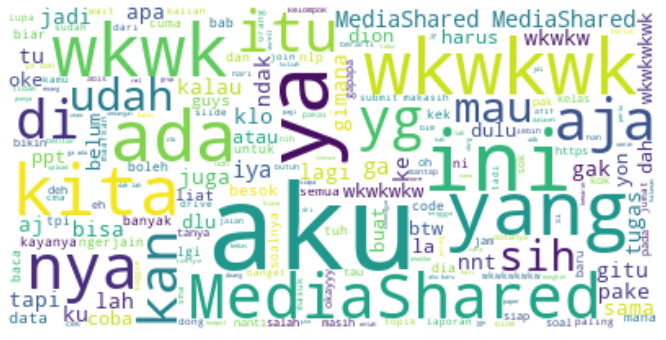

In [ ]:
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### **EDA 06 : Tampilkan analisis dan visualisasi data terkait waktu grup aktif pada dataset!**

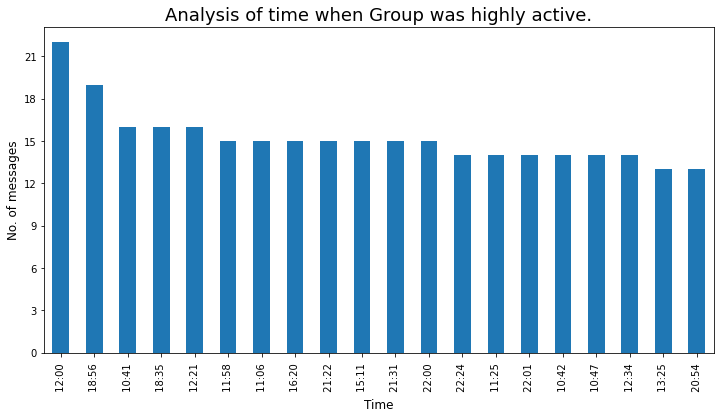

In [ ]:
plt.figure(figsize = (12,6))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer = True))
plt.xlabel('Time', fontdict = {'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages', fontdict = {'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.', fontdict = {'fontsize': 18,'fontweight': 8})
plt.show()

### **EDA 07 : Tampilkan analisis dan visualisasi data terkait bulan grup aktif pada dataset!**

In [ ]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)

df.drop('Mon', axis = 1, inplace = True)

df

,Date,Day,Time,Name,Text,Letters,Words,Url_Count,Media_Count,Year,Month
0,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,hai rekan rekan,16,4,0,0,2021,Oct
1,2021-10-29,Friday,22:00,Apep,q,2,2,0,0,2021,Oct
2,2021-10-29,Friday,22:00,Apep,😂,2,2,0,0,2021,Oct
3,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,mari berdoa,12,3,0,0,2021,Oct
4,2021-10-29,Friday,22:00,Apep,anjirr 😂,9,3,0,0,2021,Oct
...,...,...,...,...,...,...,...,...,...,...,...
3044,2022-03-17,Thrusday,16:07,Dionisius Pratama ITB BI,what???,8,2,0,0,2022,Mar
3045,2022-03-17,Thrusday,16:09,Apep,MediaShared,12,2,0,0,2022,Mar
3046,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,kalimatnya vd mulai relevan,28,5,0,0,2022,Mar
3047,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,"""yang penting ngerjain tugas dan ngumpulin ga...",52,9,0,0,2022,Mar


In [ ]:
df['Month_Year'] = df['Date'].dt.to_period('M')

df

,Date,Day,Time,Name,Text,Letters,Words,Url_Count,Media_Count,Year,Month,Month_Year
0,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,hai rekan rekan,16,4,0,0,2021,Oct,2021-10
1,2021-10-29,Friday,22:00,Apep,q,2,2,0,0,2021,Oct,2021-10
2,2021-10-29,Friday,22:00,Apep,😂,2,2,0,0,2021,Oct,2021-10
3,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,mari berdoa,12,3,0,0,2021,Oct,2021-10
4,2021-10-29,Friday,22:00,Apep,anjirr 😂,9,3,0,0,2021,Oct,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...
3044,2022-03-17,Thrusday,16:07,Dionisius Pratama ITB BI,what???,8,2,0,0,2022,Mar,2022-03
3045,2022-03-17,Thrusday,16:09,Apep,MediaShared,12,2,0,0,2022,Mar,2022-03
3046,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,kalimatnya vd mulai relevan,28,5,0,0,2022,Mar,2022-03
3047,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,"""yang penting ngerjain tugas dan ngumpulin ga...",52,9,0,0,2022,Mar,2022-03


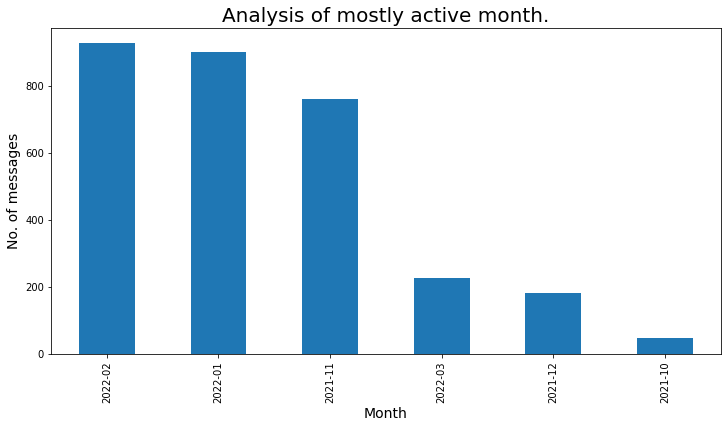

In [ ]:
plt.figure(figsize = (12,6))
active_month = df['Month_Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month', fontdict = {'fontsize': 14, 'fontweight': 10})
plt.ylabel('No. of messages', fontdict = {'fontsize': 14, 'fontweight': 10})
plt.title('Analysis of mostly active month.', fontdict = {'fontsize': 20, 'fontweight': 8})
plt.show()

### **EDA 08 : Tampilkan analisis dan visualisasi data terkait tahun grup aktif pada dataset!**

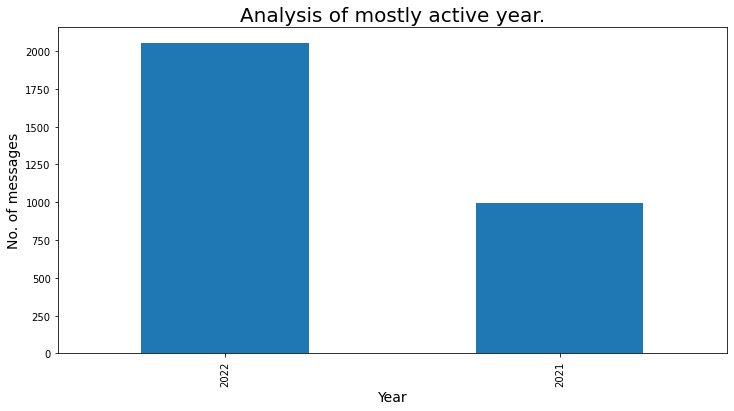

In [ ]:
plt.figure(figsize = (12,6))
active_month = df['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year', fontdict = {'fontsize': 14, 'fontweight': 10})
plt.ylabel('No. of messages', fontdict = {'fontsize': 14, 'fontweight': 10})
plt.title('Analysis of mostly active year.', fontdict = {'fontsize': 20, 'fontweight': 8})
plt.show()

### **EDA 09 : Tampilkan analisis dan visualisasi data kenormalan sampel frekuensi pada dataset!**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3049 non-null   datetime64[ns]
 1   Day          3049 non-null   category      
 2   Time         3049 non-null   object        
 3   Name         3049 non-null   object        
 4   Text         3049 non-null   object        
 5   Letters      3049 non-null   int64         
 6   Words        3049 non-null   int64         
 7   Url_Count    3049 non-null   int64         
 8   Media_Count  3049 non-null   int64         
 9   Year         3049 non-null   int64         
 10  Month        3049 non-null   object        
 11  Month_Year   3049 non-null   period[M]     
dtypes: category(1), datetime64[ns](1), int64(5), object(4), period[M](1)
memory usage: 265.5+ KB


In [ ]:
df[['Hours', 'Minute']] = df['Time'].str.split(':', expand = True)

In [ ]:
df

,Date,Day,Time,Name,Text,Letters,Words,Url_Count,Media_Count,Year,Month,Month_Year,Hours,Minute
0,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,hai rekan rekan,16,4,0,0,2021,Oct,2021-10,22,00
1,2021-10-29,Friday,22:00,Apep,q,2,2,0,0,2021,Oct,2021-10,22,00
2,2021-10-29,Friday,22:00,Apep,😂,2,2,0,0,2021,Oct,2021-10,22,00
3,2021-10-29,Friday,22:00,Dionisius Pratama ITB BI,mari berdoa,12,3,0,0,2021,Oct,2021-10,22,00
4,2021-10-29,Friday,22:00,Apep,anjirr 😂,9,3,0,0,2021,Oct,2021-10,22,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,2022-03-17,Thrusday,16:07,Dionisius Pratama ITB BI,what???,8,2,0,0,2022,Mar,2022-03,16,07
3045,2022-03-17,Thrusday,16:09,Apep,MediaShared,12,2,0,0,2022,Mar,2022-03,16,09
3046,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,kalimatnya vd mulai relevan,28,5,0,0,2022,Mar,2022-03,16,10
3047,2022-03-17,Thrusday,16:10,Dionisius Pratama ITB BI,"""yang penting ngerjain tugas dan ngumpulin ga...",52,9,0,0,2022,Mar,2022-03,16,10


In [ ]:
df['Hours'] = df['Hours'].astype('int64')
df['Minute'] = df['Minute'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3049 non-null   datetime64[ns]
 1   Day          3049 non-null   category      
 2   Time         3049 non-null   object        
 3   Name         3049 non-null   object        
 4   Text         3049 non-null   object        
 5   Letters      3049 non-null   int64         
 6   Words        3049 non-null   int64         
 7   Url_Count    3049 non-null   int64         
 8   Media_Count  3049 non-null   int64         
 9   Year         3049 non-null   int64         
 10  Month        3049 non-null   object        
 11  Month_Year   3049 non-null   period[M]     
 12  Hours        3049 non-null   int64         
 13  Minute       3049 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(7), object(4), period[M](1)
memory usage: 313.1+ KB


In [ ]:
analysis_2_df = df.groupby(['Hours', 'Day'], as_index = False)["Text"].count()
analysis_2_df.dropna(inplace = True)
analysis_2_df

,Hours,Day,Text
0,0,Friday,1
1,0,Monday,2
2,0,Saturday,0
3,0,Sunday,0
4,0,Thrusday,0
...,...,...,...
135,23,Saturday,0
136,23,Sunday,3
137,23,Thrusday,35
138,23,Tuesday,1


In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


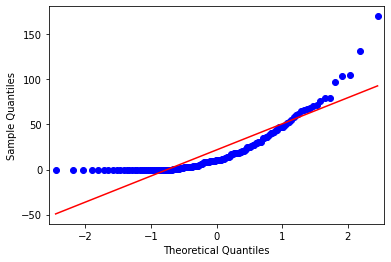

In [ ]:
qqplot(analysis_2_df['Text'], line='s')
plt.show()

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(analysis_2_df['Text'])
print('Statistics = %.3f, p = %.3f' % (stat, p))

Statistics=0.753, p=0.000


In [ ]:
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### **EDA 10 : Tampilkan analisis korelasi dan visualisasi data terkait dengan waktu dan hari terhadap jumlah pesan yang dikirimkan dalam grup pada dataset**

In [ ]:
analysis_2_df['Day'].unique()

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday',
                         'Wednesday']

In [ ]:
day_of_week = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday']

In [ ]:
from heatmap import heatmap, corrplot

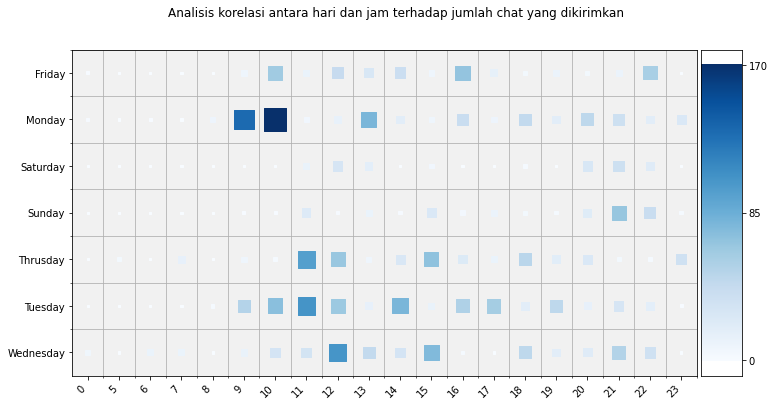

In [ ]:
plt.figure(figsize = (12,6))
heatmap(
    x = analysis_2_df['Hours'],
    y = analysis_2_df['Day'],
    size_scale = 500,
    size = analysis_2_df['Text'], 
    y_order = day_of_week[::-1],
    color = analysis_2_df['Text'],
)
plt.suptitle('Analisis korelasi antara hari dan jam terhadap jumlah chat yang dikirimkan')
plt.show()

# TERIMAKASIH